## Module 5 Python Practice


This notebook will reproduce some of the plots created in [L5_Pyramid_Practice](L5_Pyramid_Practice.ipynb) and [L5_Bubble_Practice](L5_Bubble_Practice.ipynb) practice notebooks in Python without using the `plotnine` library. 

For the use of `plotnine` in Python for bubble and pyramid charts, refer to the [L5_Bubble_Practice_plotnine](L5_Bubble_Practice_plotnine.ipynb) and [L5_Pyramid_Practice_plotnine](L5_Pyramid_Practice_plotnine.ipynb) notebooks. 

Here, we will use Python's matplotlib library and plotly for replicating bubble charts and population pyramids.

In [1]:
import pandas as pd
crime = pd.read_csv("/dsa/data/all_datasets/crime.csv")

crime.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


In [2]:
list(crime)

['state',
 ' murder',
 ' Forcible_rate',
 ' Robbery',
 ' aggravated_assult',
 ' burglary',
 ' larceny_theft',
 ' motor_vehicle_theft',
 ' population']

The column names have a space in front of them. remove the spaces or update the column names before trying to access them. 

In [3]:
crime.rename(index=str, columns={" murder": "murder", " Forcible_rate": "Forcible_rate", " Robbery":"Robbery", \
                                " aggravated_assult":"aggravated_assult", " burglary":"burglary", \
                                 " larceny_theft":"larceny_theft", " motor_vehicle_theft":"motor_vehicle_theft", \
                                " population":"population"}, inplace=True)

In [4]:
list(crime)

['state',
 'murder',
 'Forcible_rate',
 'Robbery',
 'aggravated_assult',
 'burglary',
 'larceny_theft',
 'motor_vehicle_theft',
 'population']

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# facecolor is just the background color of the plot and figsize controls the size of the plot
fig, ax = plt.subplots(facecolor='w', figsize=(14, 10))

# the bubbles on the plot are plotted based on population of each datapoint. Since the population numbers are huge, 
# radius variable has smaller numbers.  
radius = np.sqrt(crime["population"].astype(float)/np.pi)

# Each iteration will give the row index value and the row in dataframe. 
# Draw the point on the plot and annonate it with state name
for key, row in crime.iterrows():
    ax.scatter(row['murder'], row['burglary'], s=radius[key], alpha=.5)
    ax.annotate(row['state'], xy=(row['murder'], row['burglary']))
plt.show()    

<Figure size 1400x1000 with 1 Axes>

### Let's create the above plot in plotly

In [6]:
import pandas as pd
import numpy as np

# Plotly in Python 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [7]:
# The reduced values in radius variable are still big for plotly plot. new_radius has normalized values that can fit 
# in the plot. 
new_radius = radius/50

(**[text and annotations](https://plot.ly/python/text-and-annotations/#custom-text-color-and-styling) : this link has many options you can play with while drawing a bubble chart.**)

The plot has murder on x-axis and burglary on y-axis. The value of mode "markers+text" is drawing the bubbles which are markers, and text is displaying text on these markers. state is given to text argument which is displayed on bubbles. market attribute is used to customize the size and color of bubbles.

In [8]:


trace = go.Scatter(
    x=crime['murder'],
    y=crime['burglary'],
    mode='markers+text',
    text=crime['state'],
    textfont=dict(
        color='#337711',
        size=10
    ),
        marker = dict(
        size=new_radius,
        color = crime.aggravated_assult,
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace]
iplot(data)

Here's the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter) for pandas style of creating scatter plots and bubble plots. 

In [9]:
from plotnine.data import diamonds
import matplotlib

matplotlib.style.use('ggplot')       # Use ggplot style plots*

In [10]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Stacked Bar Chart

Let's try to reproduce the stacked bar chart created in [L5_Pyramid_Practice](L5_Pyramid_Practice.ipynb).

In the R version of ggplot, you can tell the plot to create stacks of bars based on y-axis. You can't do that in plotly. 

R ggplot syntax: 

```R
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity))
```

The fill parameter is filling the bars based on frequency distribution of values. But, plotly takes separate input data for y-axis to create stacks of bars. Run the cell below to see how it is done as an example. 

In [11]:
trace1 = go.Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[20, 14, 23],
    name='SF Zoo'
)
trace2 = go.Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[12, 18, 29],
    name='LA Zoo'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

To imitate this behavior, code cell below is creating eight different traces for each category of clarity to produce the stacked bar chart.

In [12]:
# number of categories in clarity is stored in counts variable. .value_counts() will give levels in a categorical 
# variable. 

counts = len(diamonds.clarity.value_counts())

In [13]:
# The names of different categories are saved in indexes variable. "Pandas.Series.value_counts().index" will give
# names of the corresponding counrs we are getting from value_counts().

indexes = diamonds.clarity.value_counts().index

Since traces are added to data before plotting, declare data as a list variable. Add traces to data variable in the for loop. Loop is iterated for each category in clarity. A temporary dataframe is created for a category, and cut and clarity columns are assigned to x and y in trace. The trace is appended to data at the end of each iteration.  

In [14]:
data=[]
for i in range(counts):
    temp_data = diamonds.loc[diamonds.clarity==indexes[i]]
    trace = go.Bar(
        x=temp_data.cut,
        y=temp_data.carat,
        name=indexes[i]
    )
    data.append(trace)

# data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Population Pyramid

In [15]:
census = pd.read_csv("/dsa/data/all_datasets/census/census2010pyr.csv")
census.head()

,sex,age,pop
0,Male,0,2014276
1,Male,1,2030853
2,Male,2,2092198
3,Male,3,2104550
4,Male,4,2077550


Two separate lists are needed with population values for males and females for plotting respective bar charts. The columns are extracted and converted into a list. 

In [16]:
# subset are created for male and female data rows
male=census[(census.sex == 'Male')]
female=census[(census.sex == 'Female')]

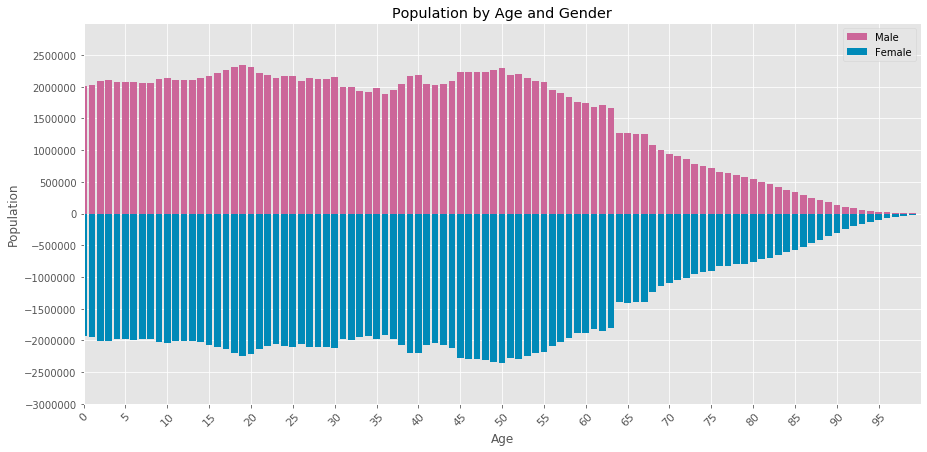

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i,row) in male.iterrows():
    [barr1, barr2] = plt.bar([i, i], [male['pop'].iloc[i], -female['pop'].iloc[i]], color=['#CC6699', '#008AB8'], width=0.8, align='center', edgecolor='none')
    
plt.xlim(0, 100)
plt.ylim(0, 3e6)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 100, 5), fontsize=11,rotation=45)
plt.yticks(np.arange(-3e6, 3e6, 500000))
plt.title("Population by Age and Gender")
plt.xlabel('Age')
plt.ylabel('Population')

plt.legend([barr1, barr2], ["Male", "Female"])

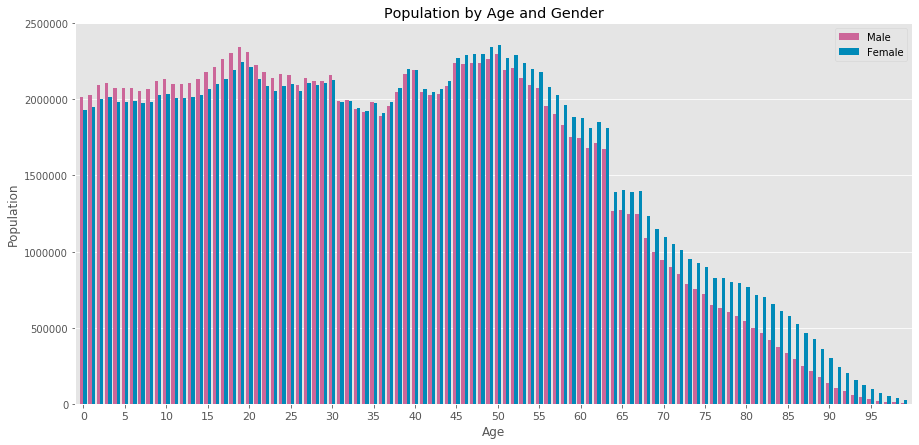

In [18]:

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

# bars are placed SIDE BY SIDE using this [i - 0.2, i + 0.2]

for (i, row) in male.iterrows():
    [barr1, barr2] = plt.bar([i - 0.2, i + 0.2], [male['pop'].iloc[i], female['pop'].iloc[i]], color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-1, 100)
plt.xticks(range(0, 100, 5), fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 3e6, 5e5))
plt.title("Population by Age and Gender")
plt.xlabel('Age')
plt.ylabel('Population')

plt.legend([barr1, barr2], ["Male", "Female"])